**MODUPEOLA OYATOKUN **
**C0895705**
**Assignment on Campus Placement **

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay



**Loading and examining the data**

In [34]:
data = pd.read_csv('/content/train.csv')  #Import data

In [35]:
data.head()  #display the dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


**Feature Descriptions**

**sl_no:** anonymous id unique to a given employee

**gender:** employee gender

**ssc_p:** SSC is Secondary School Certificate (Class 10th). ssc_p is the percentage of marks secured in Class 10th.

**ssc_b:** SSC Board. Binary feature.

**hsc_p:** HSC is Higher Secondary Certificate (Class 12th). hsc_p is the percentage of marks secured in Class 12th.

**hsc_b:** HSC Board. Binary feature.

**hsc_s:** HSC Subject. Feature with three categories.

**degree_p:** percentage of marks secured while acquiring the degree.

**degree_t:** branch in which the degree was acquired. Feature with three categories.

**workex:** Whether the employee has some work experience or not. Binary feature.

**etest_p:** percentage of marks secured in the placement exam.

**specialisation:** the specialization that an employee has. Binary feature.

**mba_p:** percentage of marks secured by an employee while doing his MBA.

**status:** whether the student was placed or not. Binary Feature. Target variable.

**salary:** annual compensation at which an employee was hired.

**DATA PREPROCESSING**

In [36]:
data.info()  #summary of the data structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


**Checking for and handling any missing values**

In [37]:
data.describe () #statistics of the numerical features of the data

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [38]:
data.isnull()# checking for missing values

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
213,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [39]:
data.isnull().sum() #sum the missing values


sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

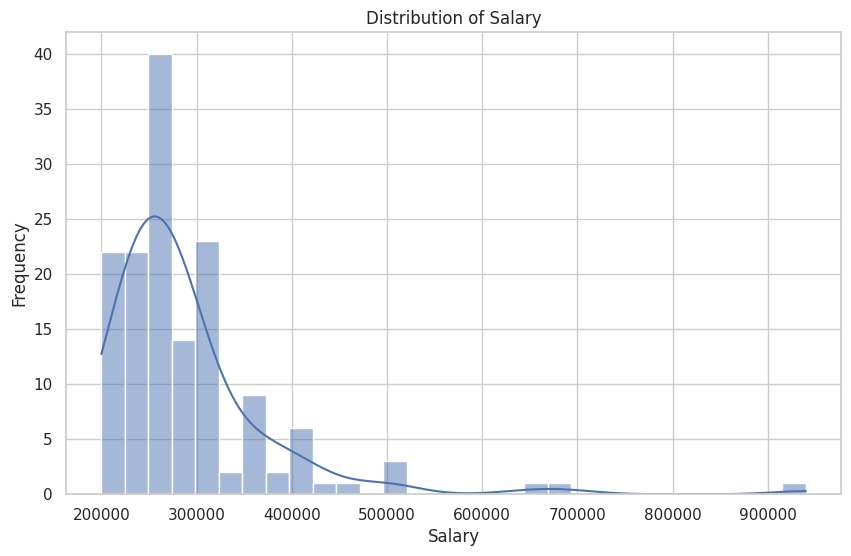

In [40]:
# Visualize the distribution of the salary data
plt.figure(figsize=(10, 6))
sns.histplot(data['salary'], kde=True, bins=30)# select the salary column to be ploted from the dataset
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show() #show the bar chart

In [41]:
median_salary = data['salary'].median() #get the median value of salary
data['salary'].fillna(median_salary, inplace=True)#Fill missing values in the salary column with the median value of the salary column
print(median_salary)

265000.0


In [42]:
data.isnull().sum() # reconfirm that all missing values are filled

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

**VISUALIZATION**

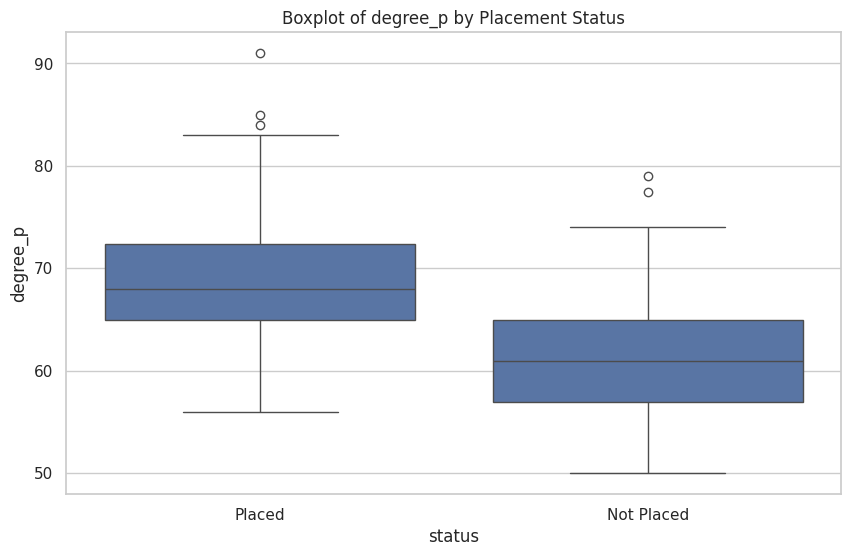

In [43]:
# Boxplot: the box diagram also shows there are few outlier
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='degree_p', data = data) #selecting the x and y axis of the box plot
plt.title('Boxplot of degree_p by Placement Status') #boxplot of percentage of marks secured while acquiring the degree by status
plt.show()

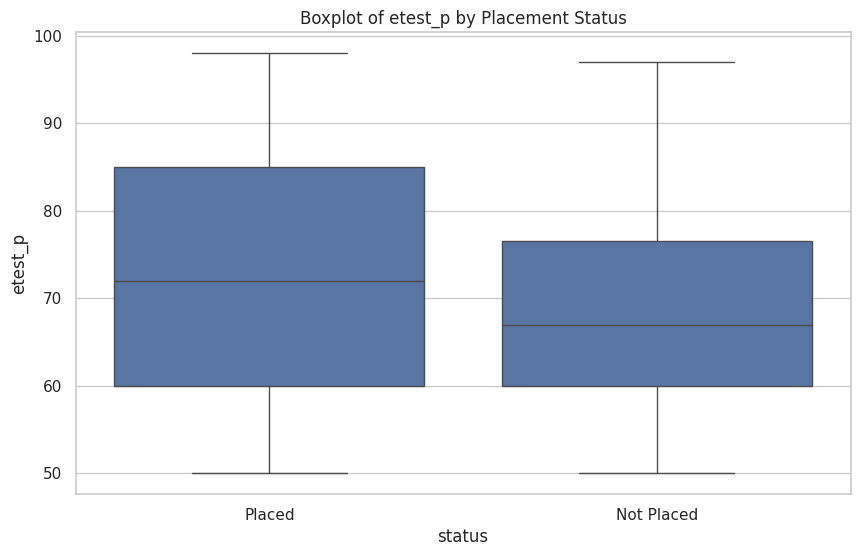

In [44]:
#Boxplot: percentage of marks secured in the placement exam by status
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='etest_p', data = data) #selecting the x and y axis of the box plot
plt.title('Boxplot of etest_p by Placement Status') #boxplot of percentage of marks secured in the placement exam by status
plt.show()

<Figure size 1800x1200 with 0 Axes>

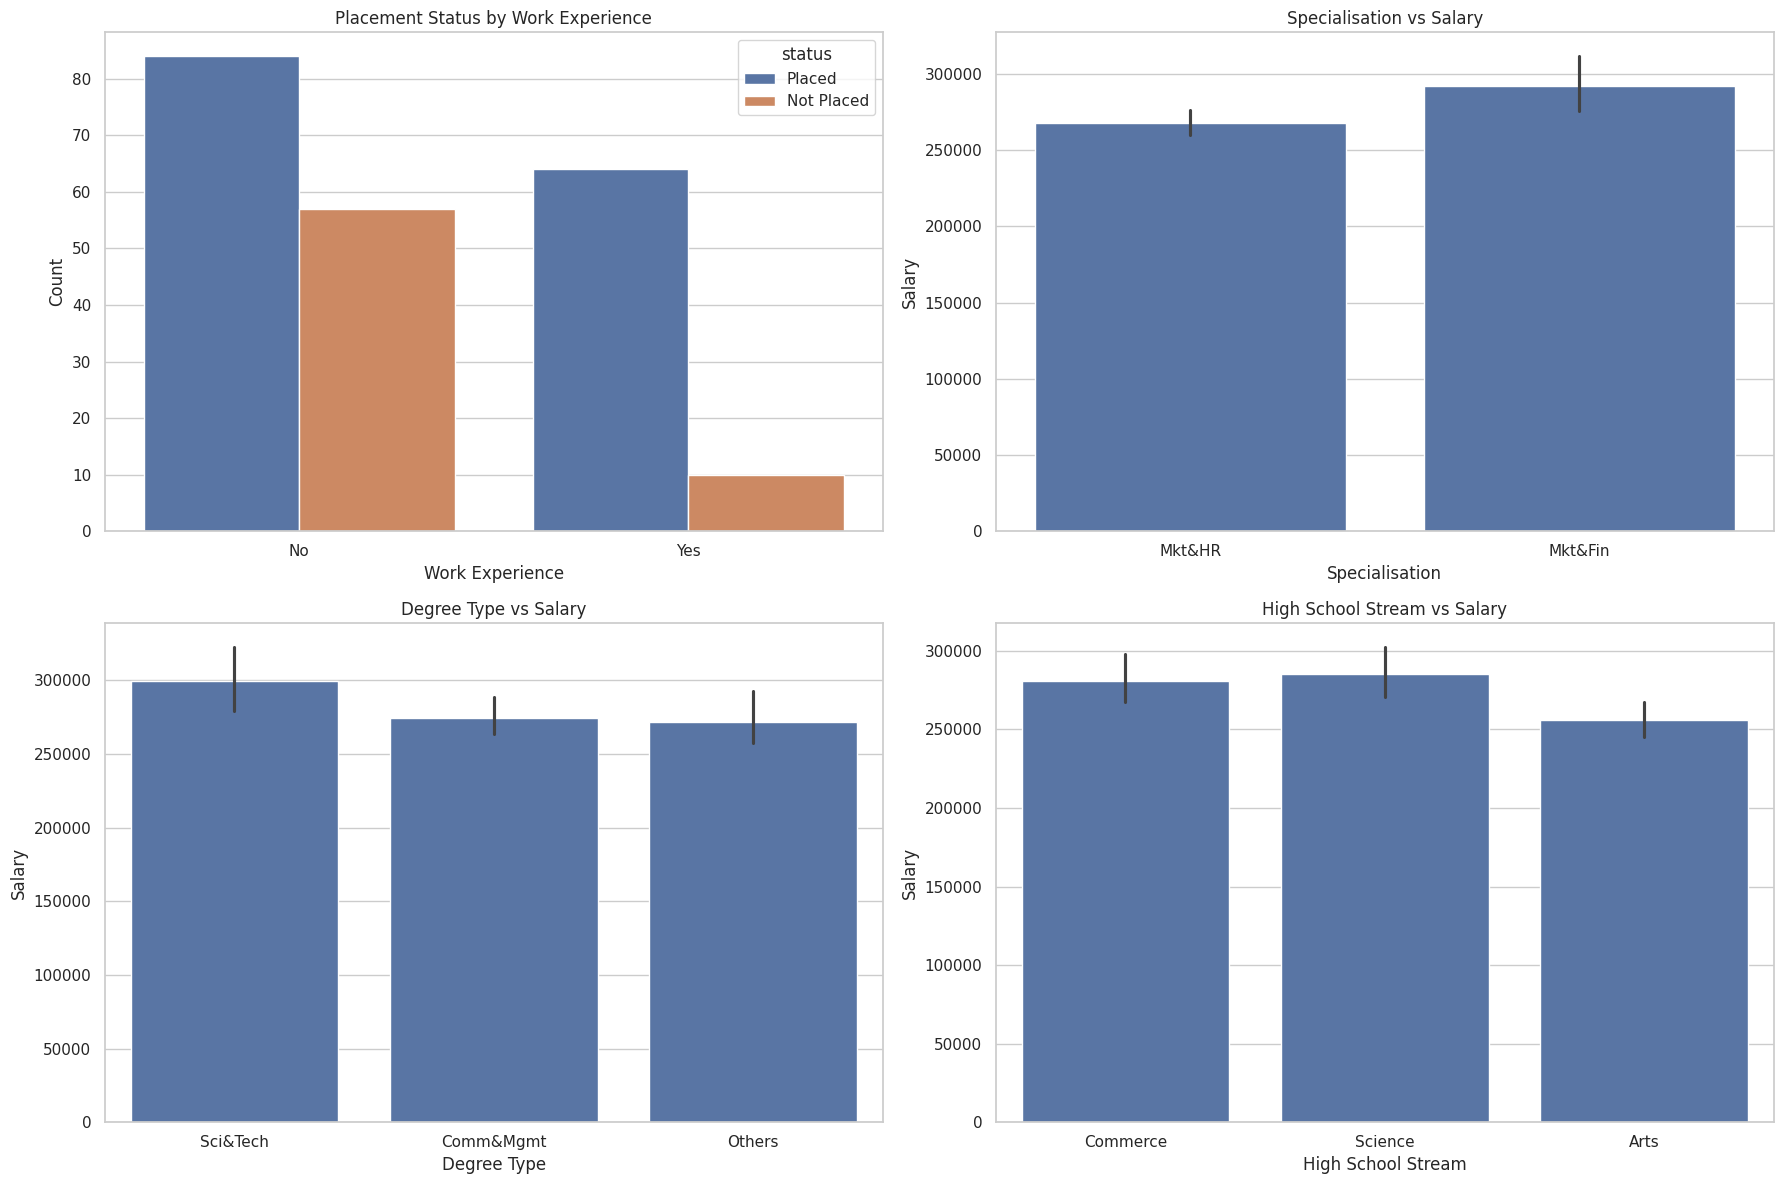

In [45]:
# Set the figure size and style
plt.figure(figsize=(18, 12))
sns.set(style="whitegrid")

# Create a subplot for each category
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Bar chart: Count plot of placement status by work experience
sns.countplot(ax=axs[0, 0], x='workex', hue='status', data=data)
axs[0, 0].set_title('Placement Status by Work Experience')
axs[0, 0].set_xlabel('Work Experience')
axs[0, 0].set_ylabel('Count')

# Bar plot for specialisation vs salary
sns.barplot(ax=axs[0, 1], x='specialisation', y='salary', data=data)
axs[0, 1].set_title('Specialisation vs Salary')
axs[0, 1].set_xlabel('Specialisation')
axs[0, 1].set_ylabel('Salary')

# Bar plot for degree_t vs salary
sns.barplot(ax=axs[1, 0], x='degree_t', y='salary', data=data)
axs[1, 0].set_title('Degree Type vs Salary')
axs[1, 0].set_xlabel('Degree Type')
axs[1, 0].set_ylabel('Salary')

# Bar plot for hsc_s vs salary
sns.barplot(ax=axs[1, 1], x='hsc_s', y='salary', data=data)
axs[1, 1].set_title('High School Stream vs Salary')
axs[1, 1].set_xlabel('High School Stream')
axs[1, 1].set_ylabel('Salary')

# Adjust layout
plt.tight_layout()
plt.show()

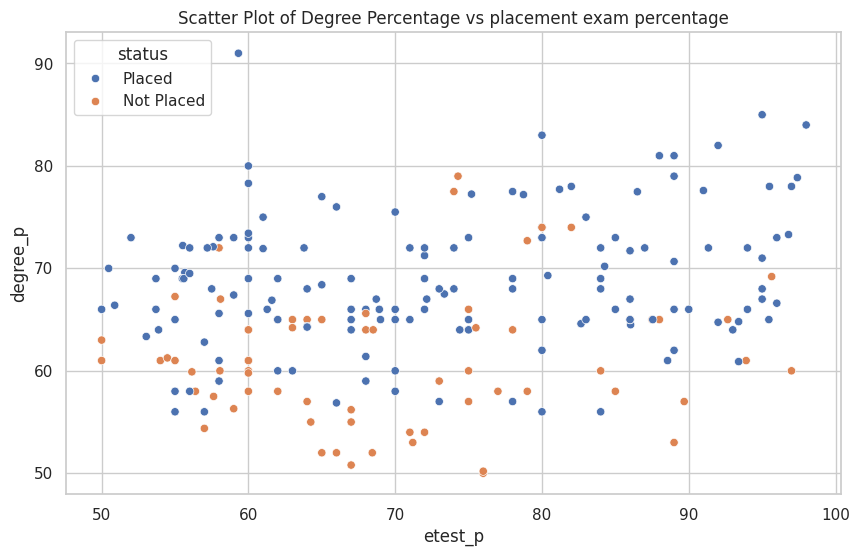

In [46]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='etest_p', y='degree_p', hue='status', data=data)
plt.title('Scatter Plot of Degree Percentage vs placement exam percentage')
plt.show()

**MODEL BUILDING WITH HYPERPARAMETER TUNING**

**Categorical features and target variable are encoded correctly**

In [47]:
# Select and Separate features and target
X = data.drop('status', axis=1)
y = data['status']

In [48]:
# Convert categorical features to one-hot encoding
categorical_features = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

In [49]:
# split into training and test sets ( 70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
# Standardize only the numerical features
numeric_features = X.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

**Logistic Regression**

In [51]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}
grid_lr = GridSearchCV(logreg, param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)
best_logreg = grid_lr.best_estimator_



**Random Forest Classifier**

In [52]:
# Random Forest Classifier
rf = RandomForestClassifier()
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_



**Support Vector Machine**

In [63]:
from sklearn.svm import SVC
# Support Vector Machine
svc = SVC()
param_grid_svc = {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
grid_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy')
grid_svc.fit(X_train, y_train)
best_svc = grid_svc.best_estimator_



**Evaluate models**

In [64]:
# Evaluate models
models = {'Logistic Regression': best_logreg, 'Random Forest': best_rf, 'SVM': best_svc}

for name, model in models.items():
    print(f"Model: {name}")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

Model: Logistic Regression
              precision    recall  f1-score   support

  Not Placed       0.76      0.62      0.68        21
      Placed       0.83      0.91      0.87        44

    accuracy                           0.82        65
   macro avg       0.80      0.76      0.78        65
weighted avg       0.81      0.82      0.81        65

Model: Random Forest
              precision    recall  f1-score   support

  Not Placed       1.00      0.71      0.83        21
      Placed       0.88      1.00      0.94        44

    accuracy                           0.91        65
   macro avg       0.94      0.86      0.88        65
weighted avg       0.92      0.91      0.90        65

Model: SVM
              precision    recall  f1-score   support

  Not Placed       0.78      0.67      0.72        21
      Placed       0.85      0.91      0.88        44

    accuracy                           0.83        65
   macro avg       0.81      0.79      0.80        65
weighted avg   

**Confusion matrix**

Model: Logistic Regression
              precision    recall  f1-score   support

  Not Placed       0.76      0.62      0.68        21
      Placed       0.83      0.91      0.87        44

    accuracy                           0.82        65
   macro avg       0.80      0.76      0.78        65
weighted avg       0.81      0.82      0.81        65



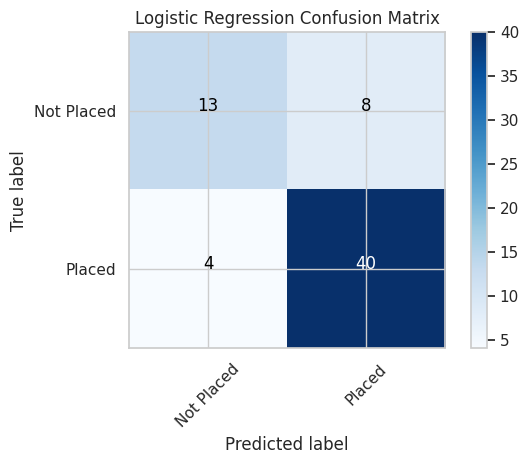

Model: Random Forest
              precision    recall  f1-score   support

  Not Placed       1.00      0.71      0.83        21
      Placed       0.88      1.00      0.94        44

    accuracy                           0.91        65
   macro avg       0.94      0.86      0.88        65
weighted avg       0.92      0.91      0.90        65



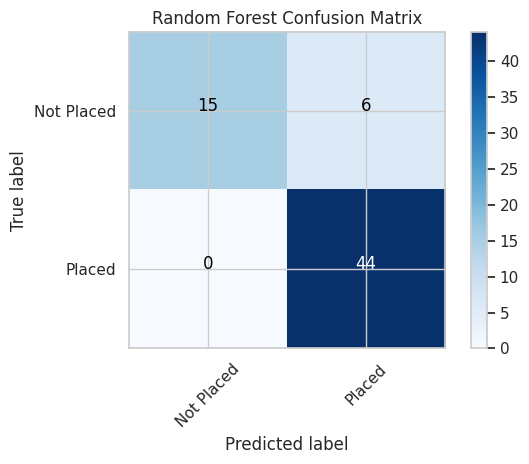

Model: SVM
              precision    recall  f1-score   support

  Not Placed       0.78      0.67      0.72        21
      Placed       0.85      0.91      0.88        44

    accuracy                           0.83        65
   macro avg       0.81      0.79      0.80        65
weighted avg       0.83      0.83      0.83        65



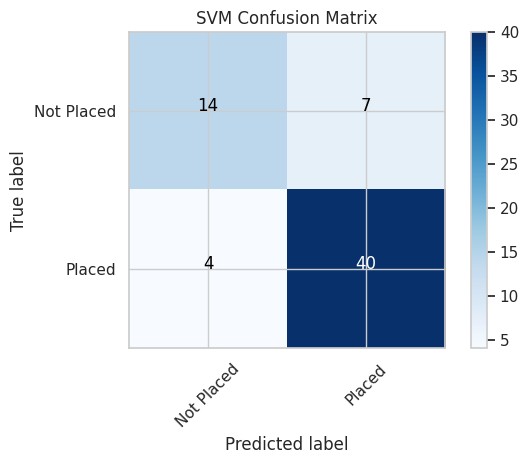

Model: Logistic Regression
              precision    recall  f1-score   support

  Not Placed       0.76      0.62      0.68        21
      Placed       0.83      0.91      0.87        44

    accuracy                           0.82        65
   macro avg       0.80      0.76      0.78        65
weighted avg       0.81      0.82      0.81        65

Model: Random Forest
              precision    recall  f1-score   support

  Not Placed       1.00      0.71      0.83        21
      Placed       0.88      1.00      0.94        44

    accuracy                           0.91        65
   macro avg       0.94      0.86      0.88        65
weighted avg       0.92      0.91      0.90        65

Model: SVM
              precision    recall  f1-score   support

  Not Placed       0.78      0.67      0.72        21
      Placed       0.85      0.91      0.88        44

    accuracy                           0.83        65
   macro avg       0.81      0.79      0.80        65
weighted avg   

In [65]:
import itertools
# Evalute models with confusion matrix
models = {'Logistic Regression': best_logreg, 'Random Forest': best_rf, 'SVM': best_svc}

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

for name, model in models.items():
    print(f"Model: {name}")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    plot_confusion_matrix(cm, classes=['Not Placed', 'Placed'], title=f'{name} Confusion Matrix')
    plt.show()

    evaluation_results = {}

for name, model in models.items():
    print(f"Model: {name}")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

    # Store evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Placed')
    recall = recall_score(y_test, y_pred, pos_label='Placed')
    f1 = f1_score(y_test, y_pred, pos_label='Placed')
    evaluation_results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}


# Print evaluation results
for model_name, metrics in evaluation_results.items():
    print(f"Evaluation Metrics for {model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("\n")


**Comparison of model performances**

                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.815385   0.833333  0.909091  0.869565
Random Forest        0.907692   0.880000  1.000000  0.936170
SVM                  0.830769   0.851064  0.909091  0.879121


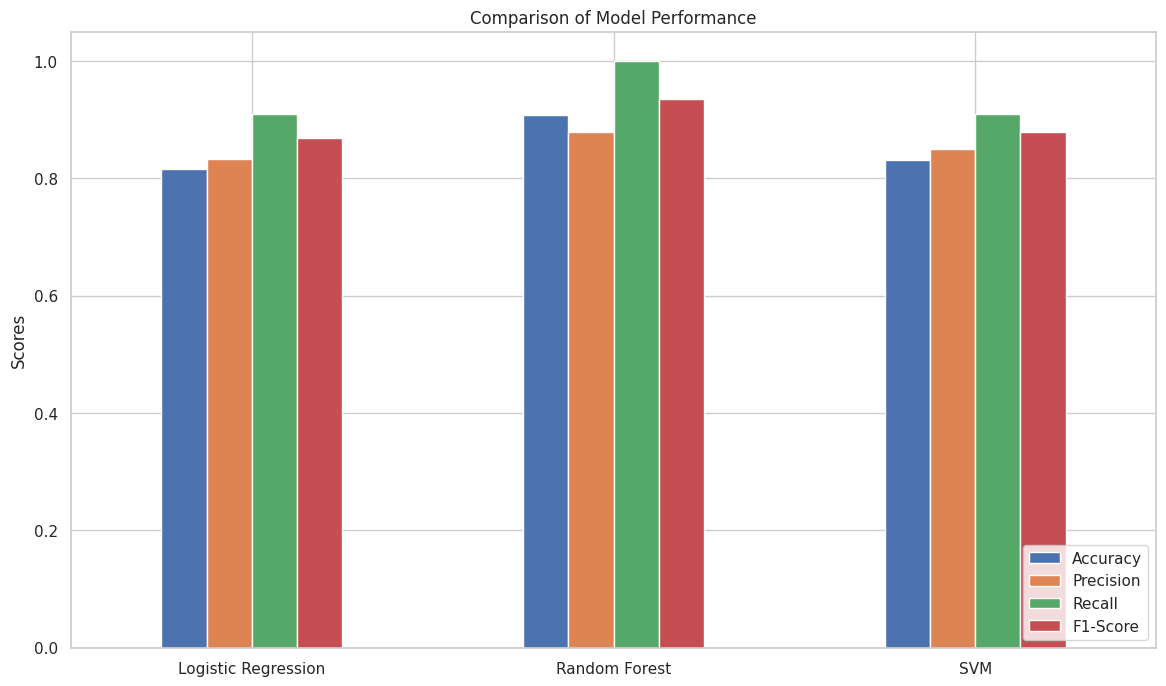

Interpretation of Results:
The Logistic Regression model shows a balanced performance across all metrics.
The Random Forest model shows a higher accuracy,precision,recall and F1-Score, indicating better overall performance.
The SVM model shows high recall but slightly lower accuracy but shows a balance accross all metrics


In [66]:
# Comparison of model performances
df_evaluation = pd.DataFrame(evaluation_results).T
print(df_evaluation)

# Visualization of evaluation metrics
df_evaluation.plot(kind='bar', figsize=(14, 8))
plt.title('Comparison of Model Performance')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

# Interpretation of Results
print("Interpretation of Results:")
print("The Logistic Regression model shows a balanced performance across all metrics.")
print("The Random Forest model shows a higher accuracy,precision,recall and F1-Score, indicating better overall performance.")
print("The SVM model shows high recall but slightly lower accuracy but shows a balance accross all metrics")


**Voting Classifier and Comparison with other Models**

Model: Voting Classifier
              precision    recall  f1-score   support

  Not Placed       0.79      0.52      0.63        21
      Placed       0.80      0.93      0.86        44

    accuracy                           0.80        65
   macro avg       0.79      0.73      0.75        65
weighted avg       0.80      0.80      0.79        65



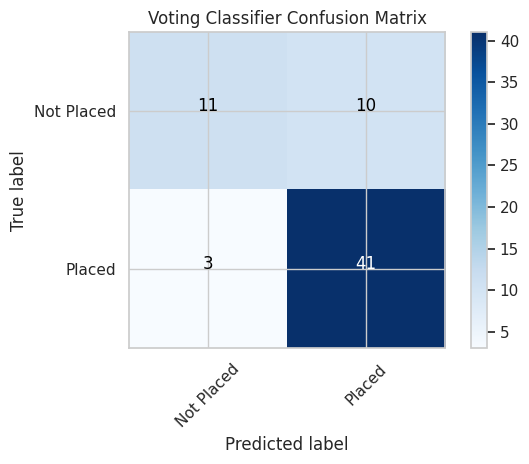

Evaluation Metrics for Logistic Regression:
Accuracy: 0.8154
Precision: 0.8333
Recall: 0.9091
F1-Score: 0.8696


Evaluation Metrics for Random Forest:
Accuracy: 0.9077
Precision: 0.8800
Recall: 1.0000
F1-Score: 0.9362


Evaluation Metrics for SVM:
Accuracy: 0.8308
Precision: 0.8511
Recall: 0.9091
F1-Score: 0.8791


Evaluation Metrics for Voting Classifier:
Accuracy: 0.8000
Precision: 0.8039
Recall: 0.9318
F1-Score: 0.8632


                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.815385   0.833333  0.909091  0.869565
Random Forest        0.907692   0.880000  1.000000  0.936170
SVM                  0.830769   0.851064  0.909091  0.879121
Voting Classifier    0.800000   0.803922  0.931818  0.863158


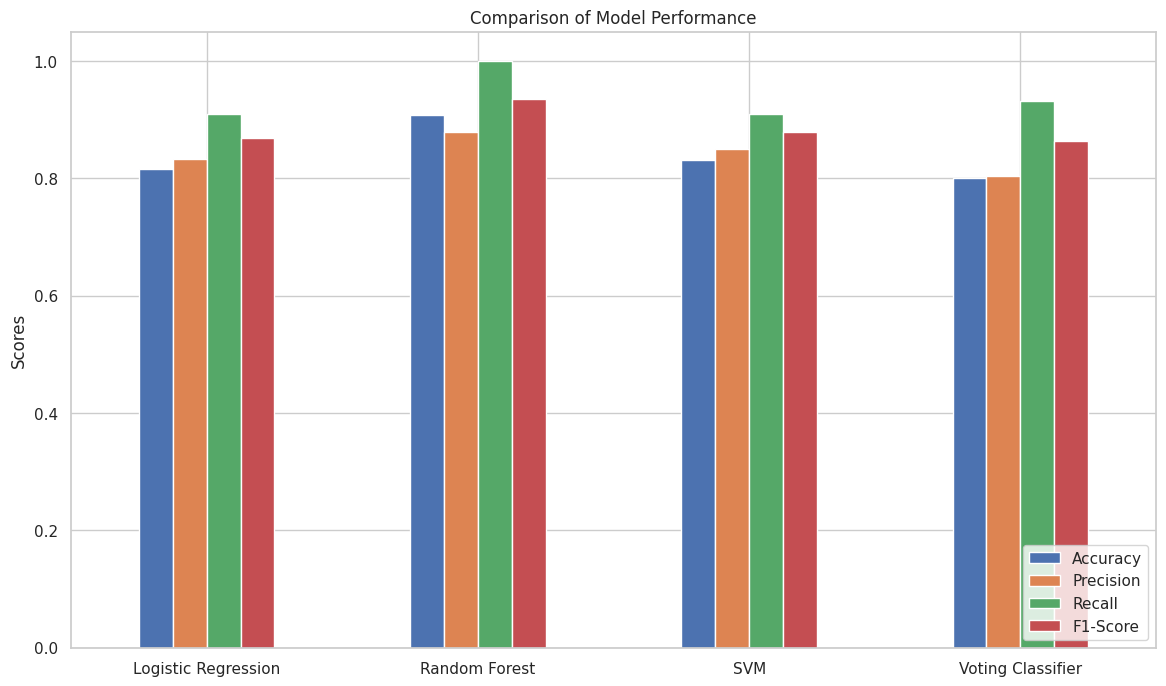

Interpretation of Results:
The Logistic Regression model shows a balanced performance across all metrics.
The Random Forest model shows a higher accuracy, precison precision and F1-Score, indicating better overall performance.
The SVM model shows high accuracy but slightly lower recall, indicating it might miss some 'Placed' predictions.
The Voting Classifier combines the strengths of the individual models, providing a robust performance across all metrics.


In [67]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import itertools

# Retrain SVM with probability=True
best_svc = SVC(kernel='rbf', C=1, gamma='scale', probability=True)
best_svc.fit(X_train, y_train)

# Create a voting classifier
voting_clf = VotingClassifier(estimators=[
    ('logreg', best_logreg),
    ('rf', best_rf),
    ('svc', best_svc)
], voting='soft')  # 'soft' uses predicted probabilities for voting

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Evaluate the voting classifier
y_pred_voting = voting_clf.predict(X_test)
print("Model: Voting Classifier")
print(classification_report(y_test, y_pred_voting))

# Store evaluation metrics for the voting classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting, pos_label='Placed')
recall_voting = recall_score(y_test, y_pred_voting, pos_label='Placed')
f1_voting = f1_score(y_test, y_pred_voting, pos_label='Placed')
evaluation_results['Voting Classifier'] = {'Accuracy': accuracy_voting, 'Precision': precision_voting, 'Recall': recall_voting, 'F1-Score': f1_voting}

# Confusion Matrix for the voting classifier
cm_voting = confusion_matrix(y_test, y_pred_voting, labels=['Not Placed', 'Placed'])
plt.figure()
plot_confusion_matrix(cm_voting, classes=['Not Placed', 'Placed'], title='Voting Classifier Confusion Matrix')
plt.show()

# Print evaluation results
for model_name, metrics in evaluation_results.items():
    print(f"Evaluation Metrics for {model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("\n")

# Comparison of model performances
df_evaluation = pd.DataFrame(evaluation_results).T
print(df_evaluation)

# Visualization of evaluation metrics
df_evaluation.plot(kind='bar', figsize=(14, 8))
plt.title('Comparison of Model Performance')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

# Interpretation of Results
print("Interpretation of Results:")
print("The Logistic Regression model shows a balanced performance across all metrics.")
print("The Random Forest model shows a higher accuracy, precison precision and F1-Score, indicating better overall performance.")
print("The SVM model shows high accuracy but slightly lower recall, indicating it might miss some 'Placed' predictions.")
print("The Voting Classifier combines the strengths of the individual models, providing a robust performance across all metrics.")
